In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 10
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine()
sns.set_style("dark")

<Figure size 1008x720 with 0 Axes>

In [9]:
ethereum_price = pd.read_csv('precio_eth.csv', sep=';')

In [10]:
ethereum_price

,Date,Last,Opening,Maximo,Minimo,Volume,% Var
0,21.07.2021,"1.968,57","1.786,18","2.007,42","1.758,64","1,16M","10,22%"
1,20.07.2021,"1.786,07","1.818,07","1.840,36","1.720,70","1,20M","-1,76%"
2,19.07.2021,"1.818,07","1.891,43","1.915,15","1.807,19","802,78K","-3,93%"
3,18.07.2021,"1.892,42","1.898,01","1.988,24","1.881,60","829,77K","-0,29%"
4,17.07.2021,"1.897,98","1.877,00","1.917,80","1.851,97","623,52K","1,05%"
...,...,...,...,...,...,...,...
1477,05.07.2017,"264,77","266,68","272,12","249,53","436,76K","-0,72%"
1478,04.07.2017,"266,68","273,99",283,260,"425,00K","-2,67%"
1479,03.07.2017,"273,99","277,64","283,98","266,45","336,35K","-1,31%"
1480,02.07.2017,"277,64",255,"285,91","242,81","488,52K","8,88%"


In [11]:
ethereum_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 7 columns):
Date       1482 non-null object
Last       1482 non-null object
Opening    1482 non-null object
Maximo     1482 non-null object
Minimo     1482 non-null object
Volume     1482 non-null object
% Var      1482 non-null object
dtypes: object(7)
memory usage: 81.2+ KB


### Cleaning characters

In [ ]:
values_to_replace_dollars = ['$', '(', ')', ',', '<']
values_to_replace_ethereum = ['Ξ', ',', '<']

for x in values_to_replace_dollars:
    transactions_df['amount_dollars'] = transactions_df['amount_dollars'].str.replace(x,'')
    
for x in values_to_replace_ethereum:
    transactions_df['amount_ethereum'] = transactions_df['amount_ethereum'].str.replace(x,'')
    


### Converting to American format: Removing "." and then replacing "," by "."

In [15]:
ethereum_price.Last = ethereum_price.Last.str.replace('.', '')
ethereum_price.Last = ethereum_price.Last.str.replace(',', '.')

In [16]:
ethereum_price.Opening = ethereum_price.Opening.str.replace('.', '')
ethereum_price.Opening = ethereum_price.Opening.str.replace(',', '.')

In [17]:
ethereum_price.Minimo = ethereum_price.Minimo.str.replace('.', '')
ethereum_price.Minimo = ethereum_price.Minimo.str.replace(',', '.')

### Defining variable's types

In [18]:
ethereum_price.Date = ethereum_price.Date.astype('datetime64')
ethereum_price.Last = ethereum_price.Last.astype('float64')
ethereum_price.Opening = ethereum_price.Opening.astype('float64')
ethereum_price.Minimo = ethereum_price.Minimo.astype('float64')

### Adding "year" and "mont" columns

In [30]:
ethereum_price['Year'] = ethereum_price.Date.dt.year

In [31]:
ethereum_price['Month'] = ethereum_price.Date.dt.month

In [32]:
ethereum_price

,Date,Last,Opening,Maximo,Minimo,Volume,% Var,Year,Month
0,2021-07-21,1968.57,1786.18,"2.007,42",1758.64,"1,16M","10,22%",2021,7
1,2021-07-20,1786.07,1818.07,"1.840,36",1720.70,"1,20M","-1,76%",2021,7
2,2021-07-19,1818.07,1891.43,"1.915,15",1807.19,"802,78K","-3,93%",2021,7
3,2021-07-18,1892.42,1898.01,"1.988,24",1881.60,"829,77K","-0,29%",2021,7
4,2021-07-17,1897.98,1877.00,"1.917,80",1851.97,"623,52K","1,05%",2021,7
...,...,...,...,...,...,...,...,...,...
1477,2017-05-07,264.77,266.68,"272,12",249.53,"436,76K","-0,72%",2017,5
1478,2017-04-07,266.68,273.99,283,260.00,"425,00K","-2,67%",2017,4
1479,2017-03-07,273.99,277.64,"283,98",266.45,"336,35K","-1,31%",2017,3
1480,2017-02-07,277.64,255.00,"285,91",242.81,"488,52K","8,88%",2017,2


# Visualizing Data

##### Making Table exposing Wroth over years

In [120]:
ethereum_price_year = ethereum_price.groupby('Year')[['Last', 'Maximo', 'Minimo']].mean().reset_index()

In [121]:
ethereum_price_year['Growth'] = round(ethereum_price_year['Last'].pct_change(), 2)

In [122]:
ethereum_price_year.Year = ethereum_price_year.Year.astype('int')

In [123]:
ethereum_price_year

,Year,Last,Minimo,Growth
0,2017,349.743533,329.241957,NaN
1,2018,481.328575,458.714932,0.38
2,2019,180.992986,175.172712,-0.62
3,2020,307.296776,295.880765,0.70
4,2021,2069.098960,1953.052574,5.73


In [134]:
ethereum_price_year_table = ethereum_price_year[['Year', 'Last', 'Growth']]
ethereum_price_year_table['Growth'] = ethereum_price_year_table['Growth']*100



C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
ethereum_price_year_table['Growth'] = ethereum_price_year_table['Growth'].astype('str') + str('%') 

C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
ethereum_price_year_table.rename(columns={'Last': 'Average Price'})

,Year,Average Price,Growth
0,2017,349.743533,nan%
1,2018,481.328575,38.0%
2,2019,180.992986,-62.0%
3,2020,307.296776,70.0%
4,2021,2069.098960,573.0%


AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

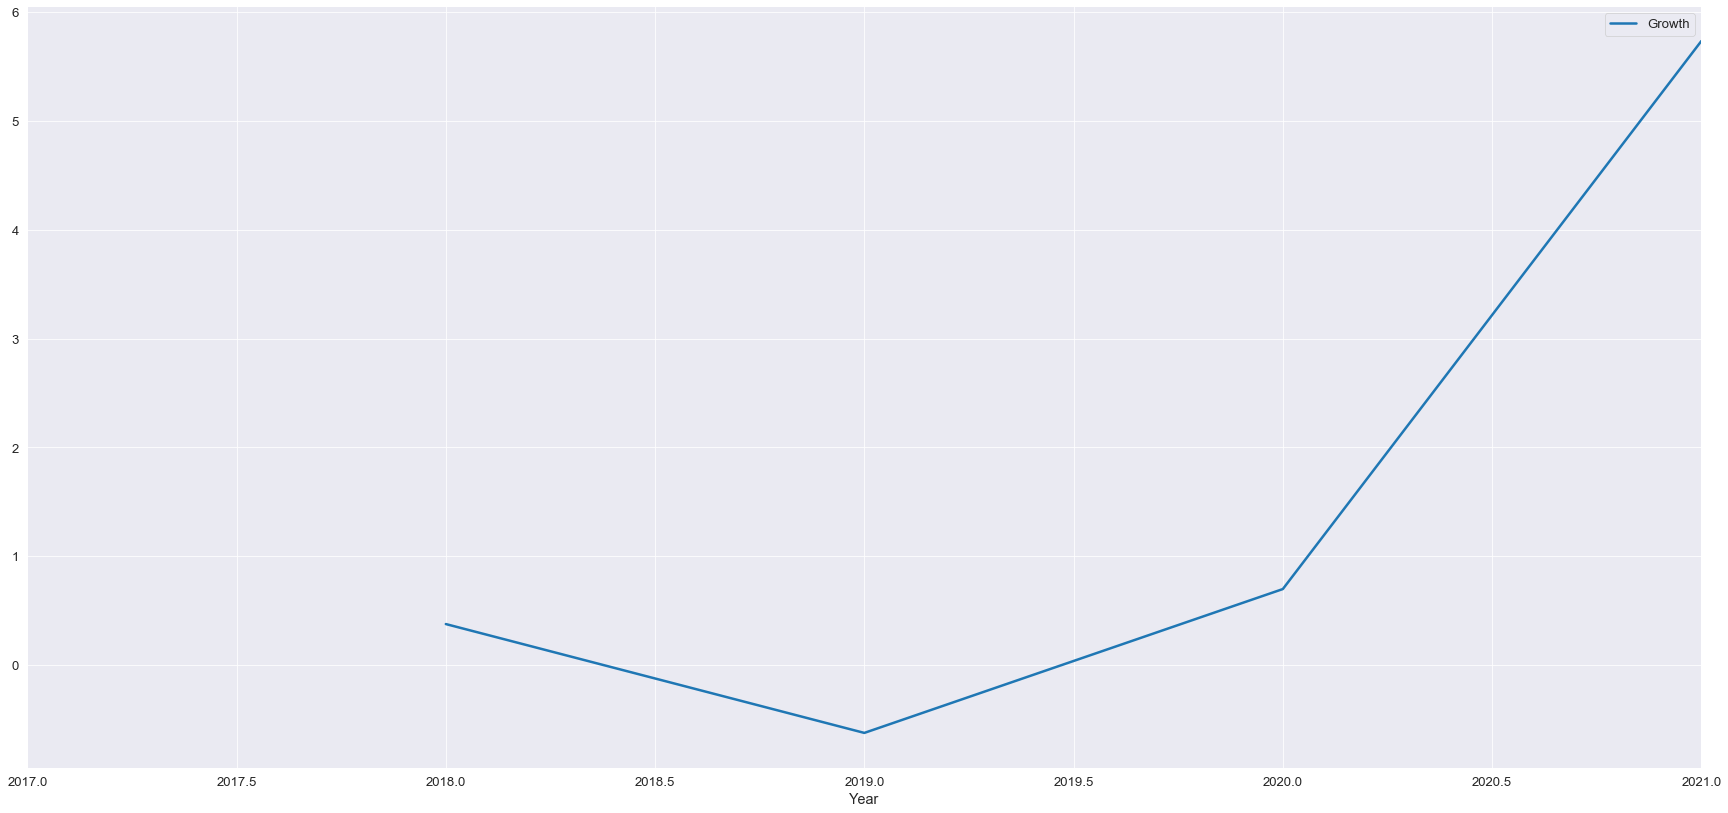

In [84]:
g = ethereum_price_year.plot(x='Year', y='Growth', grid=True, figsize=(30,14))
g.ylabel('Growth Rate %')
g.title('Ethereum (ETH) Price Growth by Year') 

### Price evolution (last value taken)

Text(0.5, 1.0, 'Average Ethereum Value Evolution')

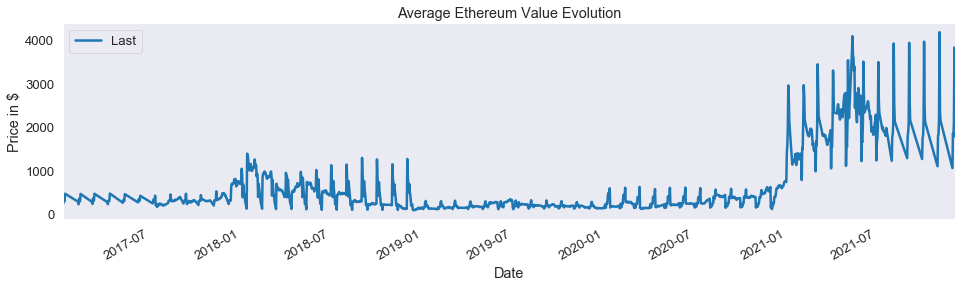

In [143]:
g = ethereum_price.plot(x='Date', y='Last', figsize=(16,4))
plt.ylabel('Price in $')
plt.title('Average Ethereum Value Evolution')

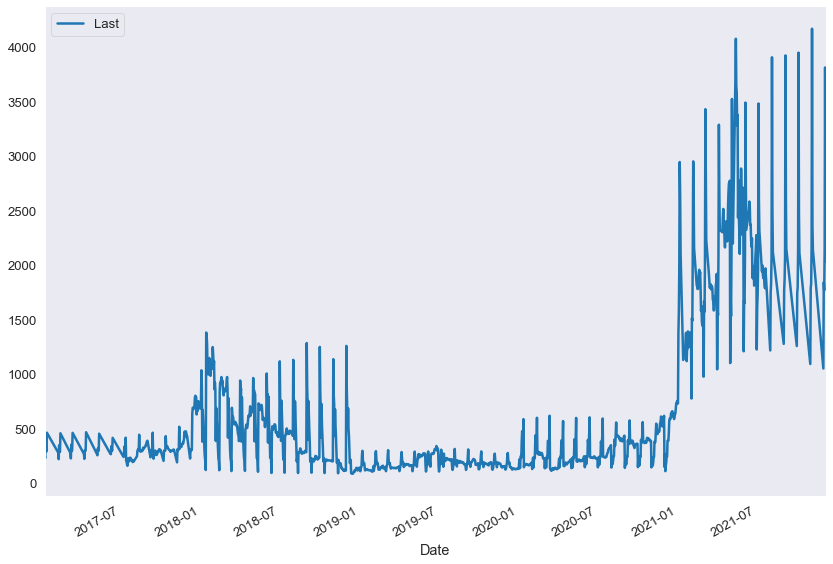

In [111]:
ethereum_price.plot.line(x='Date', y='Last')

### Isolating Price Evolution on last year

In [40]:
ethereum_price_2021 = ethereum_price[ethereum_price['Year']==2021]

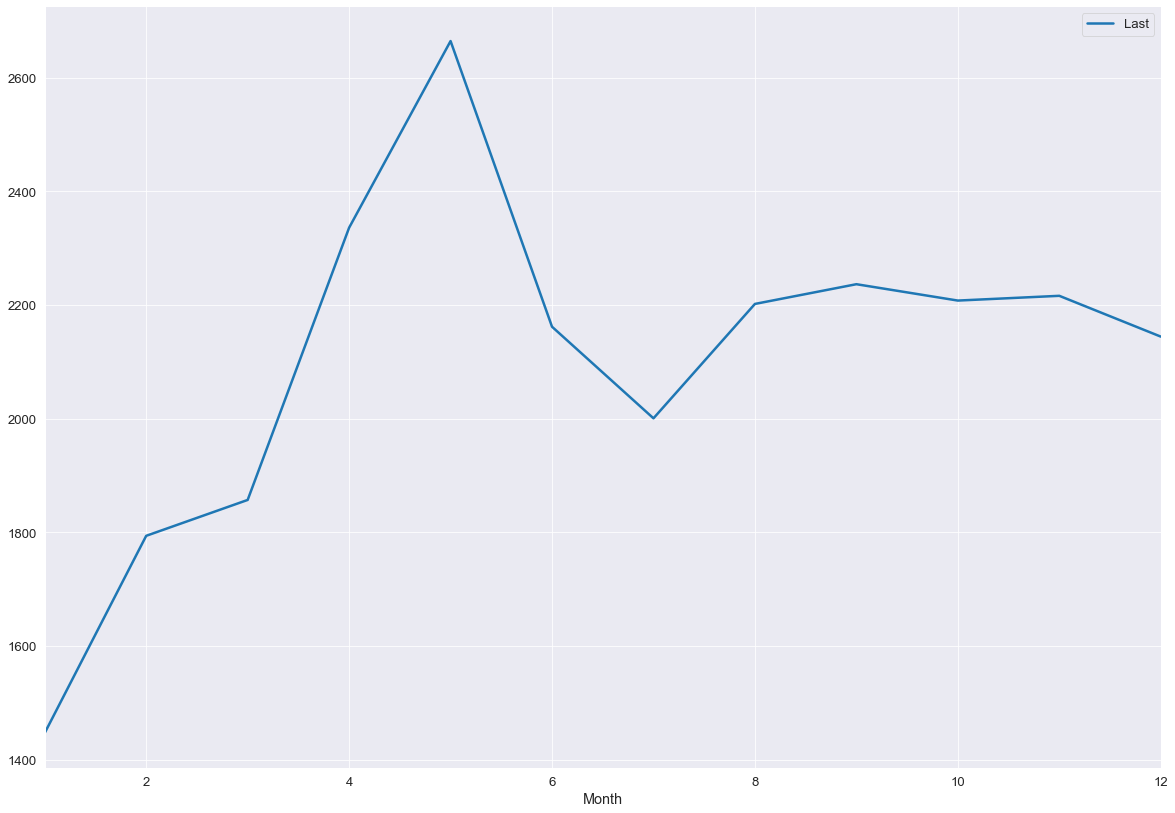

In [101]:
ethereum_price_2021.groupby('Month').mean()['Last'].reset_index().plot(x='Month', y='Last', figsize=(20,14), grid=True)

### Precio medio y crecimiento por año

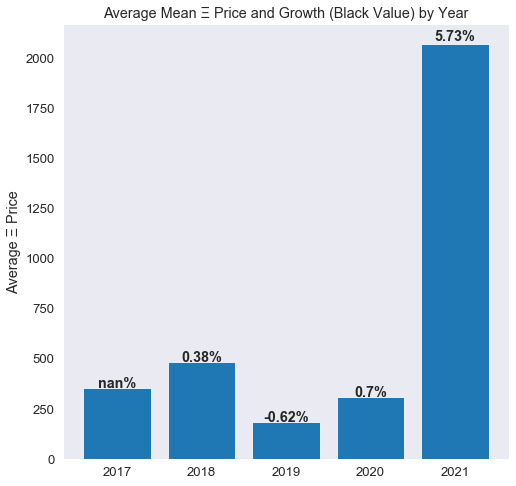

In [138]:
plt.figure(figsize=(8, 8))
colors_list = ['2017','2018', '2019', '2020', '2021']
graph = plt.bar(ethereum_price_year.Year, ethereum_price_year.Last)
plt.title('Average Mean Ξ Price and Growth (Black Value) by Year')
plt.ylabel('Average Ξ Price')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(ethereum_price_year.Growth[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()

In [103]:
height

2069.09896039604